### This notebook is a basic example of how to use the GLODAP Section Gridder.
#### Load in plots package, DIVA wrapper functions, set directory locations and filenames

This example works under the assumption that you have git cloned the GLODAP_Section_Gridder
toolbox, and that therefore you are in its top level folder. If this is not the case, set it 
manually in the Julia block below.

In [1]:
toolboxDir = "/Users/ct6g18/Julia/GLODAP_Section_Gridder/"
cd(toolboxDir)
using GLODAP_Section_Gridder

We are now going to read the defaults out. These can be found in `$toolboxDir/defaults.toml`,
if you wish to change them. However, all following function calls in this example 
will explicitly pass arguments with defaults.

In [2]:
GLODAP_Section_Gridder.readDefaults()

Dict{String, Any} with 10 entries:
  "GOSHIP_DIR"          => "/Users/ct6g18/MATLAB/GO_SHIP"
  "GLODAP_FILENAME"     => "GLODAPv2.2021_Merged_Master_File.mat"
  "USERNAME"            => "Charles Turner"
  "EXCEPTIONS_FILENAME" => "ExpocodeList.csv"
  "OUTPUTS_DIR"         => "/Users/ct6g18/Julia/GriddedSections"
  "HORZLEN_EXCEPTIONS"  => "horzLenExceptions.csv"
  "MASK_MATFILE"        => "/Users/ct6g18/Julia/GLODAP_Section_Gridder/data/GOS…
  "VARIABLE_EXCEPTIONS" => "variableExceptions.csv"
  "EXCEPTIONS_DIR"      => "data/Exceptions"
  "GLODAP_DIR"          => "/Users/ct6g18/MATLAB/GLODAP"

As you can see, these defaults are set to sensible defaults on my (CT) machine.
As a user, you may change these by editing  `$toolboxDir/defaults.toml`, or by 
manually setting them in function calls. For now, we will simply set them by hand:
as a user, you will need to edit the following code block.

Note that unless an absolute path is set, you should not need to edit any defaults
in the current implementation.

`GOSHIP_DIR` refers to the directory where you have git cloned the GO-SHIP Easy 
Ocean toolbox. `GLODAP_DIR` refers to the location where you keep the GLODAP 
Merged Master File. 

In [3]:
GOSHIP_DIR = "/Users/ct6g18/MATLAB/GO_SHIP"
GLODAP_DIR = "/Users/ct6g18/MATLAB/GLODAP"
GLODAP_FILENAME = "GLODAPv2.2021_Merged_Master_File.mat"
MASK_MATFILE = "data/GOSHIP_MaskStruct.mat"

"data/GOSHIP_MaskStruct.mat"

At this point, check that the files we need for the toolbox have been correctly 
specified.


GLODAP File:

In [4]:
@assert(isfile(joinpath(GLODAP_DIR,GLODAP_FILENAME))) 

GO-SHIP Files:  (tested using a random file within GO-SHIP Easy Ocean)

In [5]:
@assert(isfile(joinpath(GOSHIP_DIR,"go_ship_clean_ctd","gridded","atlantic","A02","a02.mat")))

Structure containing masks:

In [6]:
@assert(isfile(joinpath(toolboxDir,MASK_MATFILE)))

If all assertions have passed, we should be able to use the toolbox.

Grid cruise and display gridded output data in a single line of code by specifying section, cruise expocode, horizontal coordinate and variable of interest

┌ Info: Vert. correlation length at z=0.0: 206.188864
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1184
┌ Info: Vert. correlation length at z=100.0: 188.594112
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1184
┌ Info: Vert. correlation length at z=200.0: 156.298912
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1184
┌ Warning: Too few data. Will use guesses (np = 9, RLz = 507.464, )
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:900
┌ Info: Vert. correlation length at z=300.0: 507.464
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1184
┌ Info: Vert. correlation length at z=400.0: 268.7280192
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1184
┌ Info: Vert. correlation length at z=500.0: 388.0513728000001
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1184
┌ Info: Vert. correlation length at z=600.0: 431.853216
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/

┌ Info: Data points at z=600.0: 323, horz. correlation length: 1.4283721514524932 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=700.0: 276, horz. correlation length: 2.1522809846778763 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=800.0: 252, horz. correlation length: 1.8793866743358598 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Warning: Too few data. Will use guesses (np = 4, RLz = 1.4772141097356881, )
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:900
┌ Info: Data points at z=900.0: 252, horz. correlation length: 1.4772141097356881 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=1000.0: 219, horz. correlation length: 2.365273576947728 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at

┌ Info: Data points at z=6000.0: 14, horz. correlation length: 22.391428582821412 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Warning: Too few data. Will use guesses (np = 4, RLz = 27.782999999999998, )
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:900
┌ Info: Data points at z=6100.0: 10, horz. correlation length: 27.782999999999998 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Warning: Too few data. Will use guesses (np = 0, RLz = 31.978749999999998, )
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:900
┌ Info: Data points at z=6200.0: 4, horz. correlation length: 31.978749999999998 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Warning: Too few data. Will use guesses (np = 0, RLz = 54.81555555555554, )
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:900
┌ Info: Data points at z=6300.0: 3, horz. correlation length

┌ Info: Data points at z=5100.0: 147, horz. correlation length: 8.353040464958216 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=5200.0: 138, horz. correlation length: 9.182681224397335 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=5300.0: 119, horz. correlation length: 9.775587535318838 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=5400.0: 106, horz. correlation length: 11.04475192091836 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=5500.0: 97, horz. correlation length: 12.156249664883077 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=5600.0: 89, horz. correlation length: 11.074626112111238 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ In

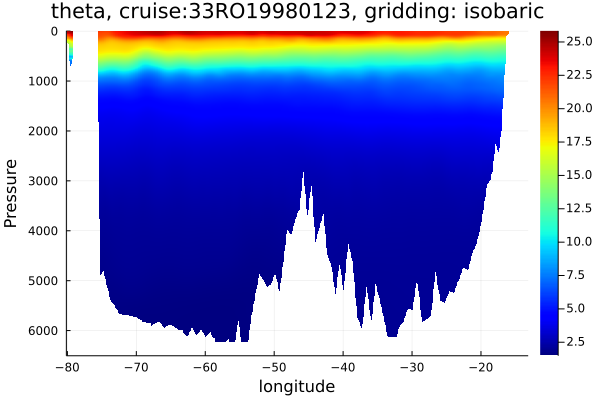

GLODAP_expocode is a string
Horizontal scale factor: 0.09727455520082248
Vertical scale factor: 0.10000000000000013
Trying to fit horizontal correlation length: attempt 1
Trying to fit horizontal correlation length: attempt 2


┌ Info: Smoothed horz. correlation length at z=5200.0: 9.221878060619064
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1113
┌ Info: Smoothed horz. correlation length at z=5300.0: 9.98834587219437
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1113
┌ Info: Smoothed horz. correlation length at z=5400.0: 10.734284086053842
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1113
┌ Info: Smoothed horz. correlation length at z=5500.0: 11.00247092551467
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1113
┌ Info: Smoothed horz. correlation length at z=5600.0: 10.561182726292005
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1113
┌ Info: Smoothed horz. correlation length at z=5700.0: 9.645346968468731
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1113
┌ Info: Smoothed horz. correlation length at z=5800.0: 8.557752445873119
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:111

651×670 Matrix{Float64}:
 NaN  NaN       NaN       NaN       …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN   24.9363   25.0117   25.1555     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN   24.8943   24.9616   25.0875     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN   24.7305   24.7924   24.9095     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN   24.4479   24.5082   24.6191     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN   23.9572   24.0387   24.1964  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN   23.6059   23.6822   23.8241     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN   23.0515   23.1495   23.3349     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN   22.5066   22.6219   22.84       NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN   22.1316   22.2559   22.4871     NaN  NaN  NaN  NaN  NaN  NaN  NaN
   ⋮                                ⋱              ⋮                 
 NaN  NaN       NaN       NaN          NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN       NaN       NaN          NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN       NaN       NaN

In [7]:
temp  = GLODAP_Section_Gridder.gridCruisePipeline(GLODAP_DIR = GLODAP_DIR,GOSHIP_DIR = GOSHIP_DIR
                           ,gridding="isobaric",MASK_MATFILE = MASK_MATFILE, sectionName = "A05"
                           ,horzCoordinate="longitude",expocode="33RO19980123",variableName="G2theta"
                           ,plotResults=true,epsilonVal=0.1)

In [8]:
Oxygen = gridCruisePipeline(GLODAP_DIR = GLODAP_DIR,GOSHIP_DIR = GOSHIP_DIR
                           ,gridding="isopycnic",MASK_MATFILE = MASK_MATFILE, sectionName = "A05"
                           ,horzCoordinate="longitude",expocode="33RO19980123",variableName="G2oxygen"
                           ,plotResults=true,epsilonVal=0.1)

UndefVarError: UndefVarError: gridCruisePipeline not defined

Grid all data from all repeats of a section and save outputs in a single line of code by specifying section name, variable and horizontal coordinate

In [9]:
DIC = gridSectionPipeline(GLODAP_DIR = GLODAP_DIR,GOSHIP_DIR = GOSHIP_DIR
                         ,sectionName="A10",horzCoordinate="longitude"
                         ,gridding="isobaric",variableName="G2tco2",epsilonVal=0.2)

UndefVarError: UndefVarError: gridSectionPipeline not defined

In [10]:
heatmap(DIC[:,:,1], yflip=true, c=:jet1)

UndefVarError: UndefVarError: DIC not defined

Grid a section of CFC-11 from P06 in 2016. First, lets list P06 cruises.

In [11]:
GLODAP_Section_Gridder.listSectionExpocodes("P06")

,Year,GLODAP Expocode,GO-SHIP Expocode
,Int64,String15,String15
1,1992,316N19920502,316N138_3\t
2,2003,49NZ20030803,49NZ20030803
3,2009,318M20091121,318M20091121
4,2017,320620170820,320620170820


So we want `expocode = 320620170820`

Now we need to work out what the variable name is.

In [12]:
GLODAP_Section_Gridder.listAvailableGLODAPVariables(GLODAP_DIR,GLODAP_FILENAME)

 
Available GLODAP variables:
DOI
G2aou
G2aouf
G2bottle
G2bottomdepth
G2c13
G2c13f
G2c13qc
G2c14
G2c14err
G2c14f
G2cast
G2ccl4
G2ccl4f
G2ccl4qc
G2cfc11
G2cfc113
G2cfc113f
G2cfc113qc
G2cfc11f
G2cfc11qc
G2cfc12
G2cfc12f
G2cfc12qc
G2chla
G2chlaf
G2cruise
G2day
G2depth
G2doc
G2docf
G2don
G2donf
G2fco2
G2fco2f
G2fco2temp
G2gamma
G2h3
G2h3err
G2h3f
G2he
G2he3
G2he3err
G2he3f
G2heerr
G2hef
G2hour
G2latitude
G2longitude
G2maxsampdepth
G2minute
G2month
G2neon
G2neonerr
G2neonf
G2nitrate
G2nitratef
G2nitrateqc
G2nitrite
G2nitritef
G2o18
G2o18f
G2oxygen
G2oxygenf
G2oxygenqc
G2pccl4
G2pcfc11
G2pcfc113
G2pcfc12
G2phosphate
G2phosphatef
G2phosphateqc
G2phts25p0
G2phts25p0f
G2phtsinsitutp
G2phtsinsitutpf
G2phtsqc
G2pressure
G2psf6
G2region
G2salinity
G2salinityf
G2salinityqc
G2sf6
G2sf6f
G2sigma0
G2sigma1
G2sigma2
G2sigma3
G2sigma4
G2silicate
G2silicatef
G2silicateqc
G2station
G2talk
G2talkf
G2talkqc
G2tco2
G2tco2f
G2tco2qc
G2tdn
G2tdnf
G2temperature
G2theta
G2toc
G2tocf
G2year
expocode
expocodeno


So we want `variableName = G2cfc11`. Now we can call `gridCruisePipeline()` to get
the data out.

┌ Info: Vert. correlation length at z=0.0: 1058.949192
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1184
┌ Info: Vert. correlation length at z=100.0: 933.0940416000002
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1184
┌ Info: Vert. correlation length at z=200.0: 660.8982016000002
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1184
┌ Info: Vert. correlation length at z=300.0: 385.0304431999999
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1184
┌ Info: Vert. correlation length at z=400.0: 259.81697280000003
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1184
┌ Info: Vert. correlation length at z=500.0: 223.88232000000005
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1184
┌ Info: Vert. correlation length at z=600.0: 241.36532000000003
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1184
┌ Info: Vert. correlation length at z=700.0: 280.07616
└ @ DIVAnd /Users/c

┌ Info: Data points at z=700.0: 194, horz. correlation length: 5.235421818079043 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=800.0: 193, horz. correlation length: 7.0654651932960455 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=900.0: 194, horz. correlation length: 9.187269465382517 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=1000.0: 185, horz. correlation length: 11.549101013029157 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=1100.0: 166, horz. correlation length: 11.1007670794887 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=1200.0: 168, horz. correlation length: 11.203602549978498 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Inf

┌ Info: Data points at z=200.0: 1313, horz. correlation length: 1.4522355536197304 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=300.0: 1411, horz. correlation length: 1.5434708095597292 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=400.0: 1507, horz. correlation length: 2.648779013513768 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=500.0: 1187, horz. correlation length: 4.47012456777369 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=600.0: 1013, horz. correlation length: 5.265216325983475 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=700.0: 902, horz. correlation length: 7.185571823698153 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ In

┌ Info: Data points at z=5700.0: 5, horz. correlation length: 122.0601600004195 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Warning: Too few data. Will use guesses (np = 0, RLz = 0.17725000000005764, )
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:900
┌ Info: Data points at z=5800.0: 4, horz. correlation length: 0.17725000000005764 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=0.0: 1604, horz. correlation length: 3.4554393829588683 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=100.0: 1701, horz. correlation length: 3.8250811581585777 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=200.0: 1789, horz. correlation length: 4.010801538263501 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at 

┌ Warning: Too few data. Will use guesses (np = 4, RLz = 5.895972222222222, )
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:900
┌ Info: Data points at z=5600.0: 36, horz. correlation length: 5.895972222222222 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Warning: Too few data. Will use guesses (np = 4, RLz = 9.74640306122449, )
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:900
┌ Info: Data points at z=5700.0: 28, horz. correlation length: 9.74640306122449 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=5800.0: 24, horz. correlation length: 6.8982875 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=5900.0: 18, horz. correlation length: 148.195726667176 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Warning: Too few data. Will use guesses (np = 8, RLz = 

┌ Info: Data points at z=4800.0: 347, horz. correlation length: 7.175117474136734 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=4900.0: 312, horz. correlation length: 6.936075848875078 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=5000.0: 278, horz. correlation length: 6.408651370567197 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=5100.0: 247, horz. correlation length: 6.325616677707822 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=5200.0: 222, horz. correlation length: 5.4450352945004585 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=5300.0: 194, horz. correlation length: 5.743740718710611 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ I

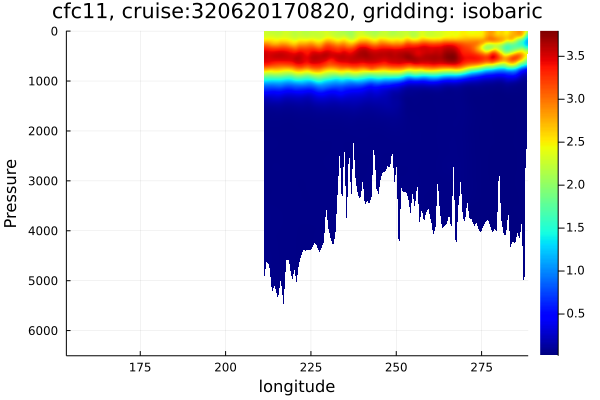

GLODAP_expocode is a string
Removing flagged data
ΔminVal = -57.6302
ΔmaxVal = 0.18500000000000227
Cruise did not occcupy full section, truncating mask
Horizontal scale factor: 0.09228472162039493
Vertical scale factor: 0.10000000000000016
Expocode contains horizonal correlation length exception for selected variable and gridding
Trying to fit horizontal correlation length: attempt 1
Trying to fit horizontal correlation length: attempt 2
Trying to fit horizontal correlation length: attempt 3
Trying to fit horizontal correlation length: attempt 4


┌ Info: Smoothed horz. correlation length at z=4600.0: 6.579019104975999
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1113
┌ Info: Smoothed horz. correlation length at z=4700.0: 6.754458491129421
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1113
┌ Info: Smoothed horz. correlation length at z=4800.0: 6.872488630127105
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1113
┌ Info: Smoothed horz. correlation length at z=4900.0: 6.776478065447358
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1113
┌ Info: Smoothed horz. correlation length at z=5000.0: 6.493429778011775
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1113
┌ Info: Smoothed horz. correlation length at z=5100.0: 6.1324946827874465
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1113
┌ Info: Smoothed horz. correlation length at z=5200.0: 5.7585521624859775
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:11

651×1353 Matrix{Float64}:
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN        NaN        NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       2.28608    2.27001  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       2.25614    2.23916  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       2.20784    2.18892  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       2.15023    2.13053  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …    2.0829     2.06264  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       2.01234    1.99143  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       1.936      1.9135   NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       1.85822    1.83387  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       1.78608    1.76262  NaN  NaN
   ⋮                        ⋮            ⋱               ⋮             
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN        NaN        NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN        NaN        NaN  NaN
 N

In [17]:
CFC11  = GLODAP_Section_Gridder.gridCruisePipeline(GLODAP_DIR = GLODAP_DIR,GOSHIP_DIR = GOSHIP_DIR
                           ,gridding="isobaric",MASK_MATFILE = MASK_MATFILE,sectionName = "P06"
                           ,horzCoordinate="longitude",expocode="320620170820",variableName="G2cfc11"
                           ,plotResults=true,epsilonVal=0.1,autoTruncateMask=true)